In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. Extract

## 1.1 population_data

### 1.1.1 population_data.csv

In [19]:
population_data_csv = 'D:\MSIB Anggun\mini-project\data_source\population_data.csv'

df_population_data_csv = pd.read_csv(population_data_csv, skiprows=3)
df_population_data_csv.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


### 1.1.2 population_data.json

In [74]:
population_data_json = 'D:\MSIB Anggun\mini-project\data_source\population_data.json'

df_population_data_json = pd.read_json(population_data_json)
df_population_data_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


### 1.1.3 population_data.xml

In [33]:
with open("D:\MSIB Anggun\mini-project\data_source\population_data.xml", "r") as f:
    xml_data = f.read()

soup = BeautifulSoup(xml_data, "xml")

countries = []
items = []
years = []
values = []

for record in soup.find_all('record'):
    # Ambil nilai dan pastikan ada text, jika tidak, beri nilai default atau None
    country = record.find("field", {"name": "Country or Area"})
    item = record.find("field", {"name": "Item"})
    year_tag = record.find("field", {"name": "Year"})
    value_tag = record.find("field", {"name": "Value"})
    
    country = country.text.strip() if country and country.text else None
    item = item.text.strip() if item and item.text else None
    year = int(year_tag.text.strip()) if year_tag and year_tag.text.strip().isdigit() else None
    value = float(value_tag.text.strip()) if value_tag and value_tag.text.strip().replace('.', '', 1).isdigit() else None

    countries.append(country)
    items.append(item)
    years.append(year)
    values.append(value)

data_list = {
    "Country": countries,
    "Item": items,
    "Year": years,
    "Value": values
}

population_data_xml = pd.DataFrame(data_list)

print(population_data_xml.head())


Empty DataFrame
Columns: [Country, Item, Year, Value]
Index: []


### 1.1.4 API

In [29]:
# API
url = 'http://api.worldbank.org/v2/countries/br;cn;us;id/indicators/SP.POP.TOTL/?format=json&per_page=1000'

response = requests.get(url)
data = response.json()[1]
data_list = []
for item in data:
    indicator = item['indicator']['value']
    country = item['country']['value']
    country_code = item['countryiso3code']
    date = item['date']
    value = item['value']
    decimal = item['decimal']

    data_list.append({
        "Indicator": indicator,
        "Country": country,
        "Country Code": country_code,
        "Date": date,
        "Value": value,
        "Decimal": decimal
    })

population_data_API = pd.DataFrame(data_list)

print(population_data_API.head())

           Indicator Country Country Code  Date        Value  Decimal
0  Population, total  Brazil          BRA  2023          NaN        0
1  Population, total  Brazil          BRA  2022  215313498.0        0
2  Population, total  Brazil          BRA  2021  214326223.0        0
3  Population, total  Brazil          BRA  2020  213196304.0        0
4  Population, total  Brazil          BRA  2019  211782878.0        0


In [34]:
url = 'http://api.worldbank.org/v2/countries/br;cn;us;id/indicators/SP.POP.TOTL/?format=json&per_page=1000'

response = requests.get(url)

print(response.json())

[{'page': 1, 'pages': 1, 'per_page': 1000, 'total': 256, 'sourceid': '2', 'lastupdated': '2024-03-28'}, [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2023', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2022', 'value': 215313498, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2021', 'value': 214326223, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2020', 'value': 213196304, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP

In [35]:
if response.status_code == 200:
  results = response.json()

  for item in results:
    print(item)

else:
  print("HTTP requests unsuccessful:", response.status_code)

{'page': 1, 'pages': 1, 'per_page': 1000, 'total': 256, 'sourceid': '2', 'lastupdated': '2024-03-28'}
[{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2023', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2022', 'value': 215313498, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2021', 'value': 214326223, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2020', 'value': 213196304, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.T

In [36]:
if response.status_code == 200:
  results = response.json()

  for item in results[1]:
    print(item)

else:
  print("HTTP requests unsuccessful:", response.status_code)

{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2023', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2022', 'value': 215313498, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2021', 'value': 214326223, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2020', 'value': 213196304, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 

### 1.1.5 DB

In [147]:
# Connect to SQLite database
conn = sqlite3.connect("D:\MSIB Anggun\mini-project\data_source\population_data.db")
cursor = conn.cursor()

# Perform select query
query = "SELECT * FROM population_data"
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

pdb = pd.DataFrame(results)

print(pdb.head())

# Close connection
conn.close()

   0            1    2                  3            4          5          6   \
0   0        Aruba  ABW  Population, total  SP.POP.TOTL    54211.0    55438.0   
1   1  Afghanistan  AFG  Population, total  SP.POP.TOTL  8996351.0  9166764.0   
2   2       Angola  AGO  Population, total  SP.POP.TOTL  5643182.0  5753024.0   
3   3      Albania  ALB  Population, total  SP.POP.TOTL  1608800.0  1659800.0   
4   4      Andorra  AND  Population, total  SP.POP.TOTL    13411.0    14375.0   

          7          8          9   ...          53          54          55  \
0    56225.0    56695.0    57032.0  ...    101353.0    101453.0    101669.0   
1  9345868.0  9533954.0  9731361.0  ...  27294031.0  28004331.0  28803167.0   
2  5866061.0  5980417.0  6093321.0  ...  21759420.0  22549547.0  23369131.0   
3  1711319.0  1762621.0  1814135.0  ...   2947314.0   2927519.0   2913021.0   
4    15370.0    16412.0    17469.0  ...     83861.0     84462.0     84449.0   

           56          57          58 

In [151]:
# Membuat koneksi ke SQLite DB
conn = sqlite3.connect('D:\MSIB Anggun\mini-project\data_source\population_data.db')

# Melakukan query dan membaca ke DataFrame
df_db = pd.read_sql_query("SELECT * FROM population_data", conn)  # Sesuaikan 'tablename'
print(df_db.head())

# Menutup koneksi
conn.close()


   index Country_Name Country_Code     Indicator_Name Indicator_Code  \
0      0        Aruba          ABW  Population, total    SP.POP.TOTL   
1      1  Afghanistan          AFG  Population, total    SP.POP.TOTL   
2      2       Angola          AGO  Population, total    SP.POP.TOTL   
3      3      Albania          ALB  Population, total    SP.POP.TOTL   
4      4      Andorra          AND  Population, total    SP.POP.TOTL   

        1960       1961       1962       1963       1964  ...        2008  \
0    54211.0    55438.0    56225.0    56695.0    57032.0  ...    101353.0   
1  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0  ...  27294031.0   
2  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0  ...  21759420.0   
3  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0  ...   2947314.0   
4    13411.0    14375.0    15370.0    16412.0    17469.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0  

## 1.2 projects_data

In [12]:
projects_data = 'D:\MSIB Anggun\mini-project\data_source\projects_data.csv'

df_projects_data_csv = pd.read_csv(projects_data, low_memory=False)
df_projects_data_csv.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [46]:
df_projects_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  object 
 1   regionname                18248 non-null  object 
 2   countryname               18248 non-null  object 
 3   prodline                  18248 non-null  object 
 4   lendinginstr              18002 non-null  object 
 5   lendinginstrtype          18002 non-null  object 
 6   envassesmentcategorycode  12437 non-null  object 
 7   supplementprojectflg      18195 non-null  object 
 8   productlinetype           18248 non-null  object 
 9   projectstatusdisplay      18244 non-null  object 
 10  status                    18244 non-null  object 
 11  project_name              18248 non-null  object 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null  object 
 14  closin

In [69]:
df_projects_data = 'D:\MSIB Anggun\mini-project\data_source\projects_data.csv'

df_projects_data_csv_err_dtype = pd.read_csv(df_projects_data, low_memory=False)
df_projects_data_csv_err_dtype.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [48]:
df_projects_data_csv_err_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  object 
 1   regionname                18248 non-null  object 
 2   countryname               18248 non-null  object 
 3   prodline                  18248 non-null  object 
 4   lendinginstr              18002 non-null  object 
 5   lendinginstrtype          18002 non-null  object 
 6   envassesmentcategorycode  12437 non-null  object 
 7   supplementprojectflg      18195 non-null  object 
 8   productlinetype           18248 non-null  object 
 9   projectstatusdisplay      18244 non-null  object 
 10  status                    18244 non-null  object 
 11  project_name              18248 non-null  object 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null  object 
 14  closin

In [50]:
df_projects_data_csv.head

<bound method NDFrame.head of             id                   regionname  \
0      P162228                        Other   
1      P163962                       Africa   
2      P167672                   South Asia   
3      P158768                   South Asia   
4      P161364                       Africa   
...        ...                          ...   
18243  P006578  Latin America and Caribbean   
18244  P037451      Europe and Central Asia   
18245  P037362      Europe and Central Asia   
18246  P037452      Europe and Central Asia   
18247  P037383      Europe and Central Asia   

                                             countryname prodline  \
0                                            World;World       RE   
1      Democratic Republic of the Congo;Democratic Re...       PE   
2      People's Republic of Bangladesh;People's Repub...       PE   
3      Islamic  Republic of Afghanistan;Islamic  Repu...       PE   
4      Federal Republic of Nigeria;Federal Republic o...    

In [51]:
df_projects_data_csv['countryname'] = df_projects_data_csv['countryname'].str.split(';').str[0]

In [52]:
df_projects_data_csv #.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.3 rural_population_percent.csv

In [9]:
rural_population_percent = 'D:\MSIB Anggun\mini-project\data_source\/rural_population_percent.csv'

df_rural_population_percent = pd.read_csv(rural_population_percent, skiprows=3)
df_rural_population_percent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


## 1.4 gdp_data.csv

In [64]:
gdp_data = 'D:\MSIB Anggun\mini-project\data_source\gdp_data.csv'

df_gdp_data = pd.read_csv(gdp_data, skiprows=3)
df_gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


### identifikasi dan hitung missing values

In [55]:
df_gdp_data.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64

In [56]:
df_gdp_data.dropna(axis=0, how='all').isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64

In [57]:
df_gdp_data.dropna(axis=1, how='all').isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

In [58]:
df_gdp_data.dropna(axis=0, how='all').isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64

In [59]:
df_gdp_data.dropna(axis=0, how='any').isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64

In [60]:
df_gdp_data.dropna(axis=0, how='any')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62


In [61]:
# Check for missing values
print(df_gdp_data.isnull().sum())

# Drop rows where all values are missing
df_gdp_data_cleaned = df_gdp_data.dropna(axis=0, how='all')

# Check for missing values after dropping rows
print(df_gdp_data_cleaned.isnull().sum())

# Inspect specific columns with missing values, if any
# For example, to inspect '1960' column:
print(df_gdp_data_cleaned['1960'].isnull().sum())

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64
140


In [62]:
# Check for missing values
print(df_gdp_data.isnull().sum())

# Drop rows where all values are missing
df_gdp_data_cleaned = df_gdp_data.dropna(axis=0, how='all')

# Check for missing values after dropping rows
print(df_gdp_data_cleaned.isnull().sum())

# Inspect specific columns with missing values, if any
# For example, to inspect '1960' column:
print(df_gdp_data_cleaned['1960'].isnull().sum())

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64
140


## 1.5 mystery.csv

In [63]:
mystery = 'D:\MSIB Anggun\mini-project\data_source\mystery.csv'

df_mystery = pd.read_csv(mystery, encoding='utf-16')
df_mystery.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


## 1.6 Electricity_access_percent.csv

In [83]:
electricity = pd.read_csv("D:\MSIB Anggun\mini-project\data_source\electricity_access_percent.csv", usecols=lambda x: x != "Unnamed:62", skiprows=4)

# 2. Transform

### 2.1 Kombinasi
cek tipe data, nilai hilang dan jumlah baris 

In [10]:
df_rural_population_percent['Country Name'].tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific'

In [13]:
import re

short_country_names = []

for idx, row in df_projects_data_csv.iterrows():
    found_short_country = None

    for country_short in df_rural_population_percent['Country Name']:
        if re.search(r'\b{}\b'.format(re.escape(country_short)), row['countryname']):
            found_short_country = country_short
            break

    short_country_names.append(found_short_country)


print(len(short_country_names))
print(short_country_names)

df_projects_data_csv['countryname_short'] = short_country_names

18248
['World', None, 'Bangladesh', 'Afghanistan', 'Nigeria', 'Tunisia', 'Nigeria', 'Nigeria', 'Nigeria', None, None, 'Nigeria', 'Nepal', 'Nigeria', 'Kyrgyz Republic', 'Jordan', 'Myanmar', None, 'Tanzania', 'Ethiopia', 'Burkina Faso', 'Uzbekistan', 'Romania', 'Ethiopia', 'Ghana', 'Ecuador', 'Vietnam', 'China', 'Senegal', 'Grenada', 'Guyana', None, 'Indonesia', 'Kenya', 'Indonesia', 'Cambodia', 'Angola', 'India', 'China', None, 'Zambia', 'Kenya', None, 'Panama', 'Tunisia', 'Tonga', 'Pakistan', 'Pakistan', 'Bangladesh', 'Niger', 'Uganda', 'Madagascar', 'Bolivia', 'Afghanistan', 'China', 'Indonesia', None, 'Morocco', None, 'Djibouti', None, 'Maldives', 'Senegal', 'Indonesia', 'China', 'China', 'China', 'Central African Republic', 'India', None, 'Cabo Verde', "Cote d'Ivoire", 'Montenegro', 'Kyrgyz Republic', 'West Bank and Gaza', 'West Bank and Gaza', 'Ethiopia', 'Ghana', 'Haiti', 'Senegal', 'Guinea', 'Haiti', 'World', 'Samoa', 'Indonesia', None, None, 'Marshall Islands', 'Angola', 'Tunisi

In [14]:
df_projects_data_csv[[
    'id', 'regionname', 'countryname', 'countryname_short'
]]

,id,regionname,countryname,countryname_short
0,P162228,Other,World;World,World
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,None
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,Bangladesh
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,Afghanistan
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,Nigeria
...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,Chile
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,Luxembourg
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,Denmark
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,Netherlands


In [15]:
df_projects_data_csv[
    df_projects_data_csv['countryname_short'] == 'Niger'][
        ['id', 'regionname', 'countryname', 'countryname_short'
    ]
]

,id,regionname,countryname,countryname_short
49,P163157,Africa,Republic of Niger;Republic of Niger,Niger
154,P163467,Africa,Republic of Niger;Republic of Niger,Niger
303,P163318,Africa,Republic of Niger;Republic of Niger,Niger
444,P163144,Africa,Republic of Niger;Republic of Niger,Niger
512,P160170,Africa,Republic of Niger;Republic of Niger,Niger
...,...,...,...,...
16848,P164563,Africa,Republic of Niger;Republic of Niger,Niger
16890,P165062,Africa,Republic of Niger;Republic of Niger,Niger
16983,P166602,Africa,Republic of Niger;Republic of Niger,Niger
17534,P001935,Africa,Republic of Niger;Republic of Niger,Niger


In [16]:
df_projects_data_csv.merge(
    df_rural_population_percent,
    how='left',
    left_on='countryname_short',
    right_on='Country Name'
).columns.tolist()

['id',
 'regionname',
 'countryname',
 'prodline',
 'lendinginstr',
 'lendinginstrtype',
 'envassesmentcategorycode',
 'supplementprojectflg',
 'productlinetype',
 'projectstatusdisplay',
 'status',
 'project_name',
 'boardapprovaldate',
 'board_approval_month',
 'closingdate',
 'lendprojectcost',
 'ibrdcommamt',
 'idacommamt',
 'totalamt',
 'grantamt',
 'borrower',
 'impagency',
 'url',
 'projectdoc ',
 'majorsector_percent ',
 'sector1',
 'sector2',
 'sector3',
 'sector4',
 'sector5',
 'sector',
 'mjsector1',
 'mjsector2',
 'mjsector3',
 'mjsector4',
 'mjsector5',
 'mjsector',
 'theme1',
 'theme2',
 'theme3',
 'theme4',
 'theme5',
 'theme ',
 'goal',
 'financier',
 'mjtheme1name',
 'mjtheme2name',
 'mjtheme3name',
 'mjtheme4name',
 'mjtheme5name',
 'location',
 'GeoLocID',
 'GeoLocName',
 'Latitude',
 'Longitude',
 'Country',
 'Unnamed: 56',
 'countryname_short',
 'Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '196

In [17]:
df_projects_data_csv.merge(
    df_rural_population_percent,
    how='left',
    left_on='countryname_short',
    right_on='Country Name'
)[[
    'countryname_short', 'Country Name'
]]

,countryname_short,Country Name
0,World,World
1,None,NaN
2,Bangladesh,Bangladesh
3,Afghanistan,Afghanistan
4,Nigeria,Nigeria
...,...,...
18243,Chile,Chile
18244,Luxembourg,Luxembourg
18245,Denmark,Denmark
18246,Netherlands,Netherlands


In [95]:
combined = pd.concat([electricity, df_rural_population_percent])

# Menampilkan tipe data dari DataFrame yang digabung
print("\nData Type:")
print(combined.dtypes)

# Menampilkan jumlah nilai yang hilang untuk setiap kolom di DataFrame yang digabung
print("\nMissing Value:")
print(combined.isnull().sum())

# Menampilkan jumlah baris duplikat di DataFrame yang digabung
print("\nDuplicates:", combined.duplicated().sum())

# Menampilkan lima baris pertama dari DataFrame yang digabung
# Jika menggunakan script bukan di Jupyter Notebook, gunakan print() sebagai gantinya:
print(combined.head())


Data Type:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Missing Value:
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              269
                 ... 
2014                7
2015                7
2016                7
2017              268
Unnamed: 62       528
Length: 63, dtype: int64

Duplicates: 0
  Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Access to electricity (% of population)   
1  Afghanistan          AFG  Access to electricity (% of population)   
2       Angola          AGO  Access to electricity (% of population)   
3      Albania          ALB  Access to electricity (% of population)   
4      Andorra    

#### 2.1.1 kombinasi population.csv dan population.json

In [20]:
merge_df_population_data_csv_json = df_population_data_csv.merge(
    df_population_data_csv,
    how='inner',
    on=['Country Name', 'Country Code']
)

In [21]:
merge_df_population_data_csv_json[
    merge_df_population_data_csv_json['1960_x'] != merge_df_population_data_csv_json['1960_y']
][[
    'Country Name', '1960_x', '1960_y'
]]

,Country Name,1960_x,1960_y
108,Not classified,NaN,NaN
194,West Bank and Gaza,NaN,NaN
212,Serbia,NaN,NaN
223,Sint Maarten (Dutch part),NaN,NaN


cek tipe data

In [22]:
merge_df_population_data_csv_json[
    merge_df_population_data_csv_json['1960_x'] != merge_df_population_data_csv_json['1960_y']
][[
    'Country Name', '1960_x', '1960_y'
]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 108 to 223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  4 non-null      object 
 1   1960_x        0 non-null      float64
 2   1960_y        0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 128.0+ bytes


kolom yang dibutuhkan

In [23]:
df_population_data_csv.merge(
    df_population_data_csv,
    how='inner',
    on=['Country Name', 'Country Code'],
    suffixes=('', '_y')
)[
    merge_df_population_data_csv_json['1960_x'] != merge_df_population_data_csv_json['1960_y']
].iloc[:, : 63]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
108,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0,NaN
212,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0,NaN
223,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0,NaN


### 2.2 Cleaning

#### 2.2.1 Cleaning population_data.csv

In [107]:
# Menampilkan informasi dasar tentang DataFrame
print(df_population_data_csv.info())

# Menampilkan beberapa baris pertama dari DataFrame untuk inspeksi visual
print(df_population_data_csv.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

In [108]:
# Cek jumlah nilai yang hilang di setiap kolom
missing_values = df_population_data_csv.isnull().sum()
print("Missing values per column:\n", missing_values)

# ATAU mengganti nilai yang hilang dengan median atau modus kolom, tergantung pada konteks data
for column in df_population_data_csv.columns:
    if df_population_data_csv[column].dtype == 'float64' or df_population_data_csv[column].dtype == 'int64':
        df_population_data_csv[column].fillna(df_population_data_csv[column].median(), inplace=True)
    else:
        df_population_data_csv[column].fillna(df_population_data_csv[column].mode()[0], inplace=True)

Missing values per column:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [109]:
# Cek dan hapus duplikat
print("Duplicate entries before removal:", df_population_data_csv.duplicated().sum())
df_population_data_csv.drop_duplicates(inplace=True)
print("Duplicate entries after removal:", df_population_data_csv.duplicated().sum())

Duplicate entries before removal: 0
Duplicate entries after removal: 0


In [110]:
# Verifikasi perubahan
print(df_population_data_csv.head())
print(df_population_data_csv.describe())

# Simpan DataFrame yang telah dibersihkan ke file baru
df_population_data_csv.to_csv('D:\MSIB Anggun\mini-project\data_clean\cleaned_population_data.csv', index=False)

  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2009  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101453.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  28004331.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  22549547.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2927519.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     84462.0   

         2010        2011        2012        2013        2014        2015  \
0  

#### 2.2.2 Cleaning population_data.json

In [111]:
# Menampilkan informasi dasar tentang DataFrame
print(df_population_data_json.info())

# Menampilkan beberapa baris pertama dari DataFrame untuk inspeksi visual
print(df_population_data_json.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

In [112]:
# Cek jumlah nilai yang hilang di setiap kolom
missing_values = df_population_data_json.isnull().sum()
print("Missing values per column:\n", missing_values)

# ATAU mengganti nilai yang hilang dengan median atau modus kolom, tergantung pada konteks data
for column in df_population_data_json.columns:
    if df_population_data_json[column].dtype == 'float64' or df_population_data_json[column].dtype == 'int64':
        df_population_data_json[column].fillna(df_population_data_json[column].median(), inplace=True)
    else:
        df_population_data_json[column].fillna(df_population_data_json[column].mode()[0], inplace=True)


Missing values per column:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64


In [113]:
# Cek dan hapus duplikat
print("Duplicate entries before removal:", df_population_data_json.duplicated().sum())
df_population_data_json.drop_duplicates(inplace=True)
print("Duplicate entries after removal:", df_population_data_json.duplicated().sum())

Duplicate entries before removal: 0
Duplicate entries after removal: 0


In [114]:
# Verifikasi perubahan
print(df_population_data_json.head())
print(df_population_data_json.describe())

# Simpan DataFrame yang telah dibersihkan ke file baru
df_population_data_json.to_csv('D:\MSIB Anggun\mini-project\data_clean\cleaned_population_data.json', index=False)

  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2008  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101353.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  27294031.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  21759420.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2947314.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0  

#### 2.2.3 cleaning population_data.xml

In [104]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse XML
tree = ET.parse('D:\MSIB Anggun\mini-project\data_source\population_data.xml')
root = tree.getroot()

# Ekstrak data
data = []
for country in root.findall('country'):
    record = {}
    for elem in country:
        record[elem.tag] = elem.text
    data.append(record)

# Konversi ke DataFrame
df_xml = pd.DataFrame(data)

# Cek nilai yang hilang dan duplikasi
print(df_xml.isnull().sum())
df_xml.drop_duplicates(inplace=True)

# Mengganti nilai yang hilang
df_xml.fillna(method='bfill', inplace=True)  # Backfill


Series([], dtype: float64)


C:\Users\HP\AppData\Local\Temp\ipykernel_40596\2030446914.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_xml.fillna(method='bfill', inplace=True)  # Backfill


#### 2.2.4 Cleaning population_data.db

In [105]:
# Membuka koneksi ke SQLite DB
conn = sqlite3.connect('D:\MSIB Anggun\mini-project\data_source\population_data.db')

# Membaca data
df_db = pd.read_sql_query("SELECT * FROM population_data", conn)

# Cek nilai yang hilang dan duplikasi
print(df_db.isnull().sum())
df_db.drop_duplicates(inplace=True)

# Mengganti nilai yang hilang
df_db.fillna(df_db.mode().iloc[0], inplace=True)  # Modus

# Menutup koneksi
conn.close()


index             0
Country_Name      0
Country_Code      0
Indicator_Name    0
Indicator_Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64


### 2.3 Encoding mystery

In [117]:
df_mystery = 'D:\MSIB Anggun\mini-project\data_source\mystery.csv'

df_mystery = pd.read_csv(mystery, encoding='utf-16')

print(df_mystery.head())


   Unnamed: 0 Country Name Country Code     Indicator Name Indicator Code  \
0           0        Aruba          ABW  Population, total    SP.POP.TOTL   
1           1  Afghanistan          AFG  Population, total    SP.POP.TOTL   
2           2       Angola          AGO  Population, total    SP.POP.TOTL   
3           3      Albania          ALB  Population, total    SP.POP.TOTL   
4           4      Andorra          AND  Population, total    SP.POP.TOTL   

        1960       1961       1962       1963       1964  ...        2008  \
0    54211.0    55438.0    56225.0    56695.0    57032.0  ...    101353.0   
1  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0  ...  27294031.0   
2  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0  ...  21759420.0   
3  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0  ...   2947314.0   
4    13411.0    14375.0    15370.0    16412.0    17469.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014 

### 2.4 imputing data

In [125]:
df_gdp_data = pd.read_csv('D:\MSIB Anggun\mini-project\data_source\gdp_data.csv', on_bad_lines='skip') 
print(df_gdp_data.isnull().sum())

Data Source                     0
World Development Indicators    0
Unnamed: 2                      1
dtype: int64


In [130]:
print(df_gdp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Data Source                   1 non-null      object 
 1   World Development Indicators  1 non-null      object 
 2   Unnamed: 2                    0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 156.0+ bytes
None


belum tuntas

In [132]:
numeric_cols = df_gdp_data.select_dtypes(include=['float64', 'int64'])

In [134]:
# Cek untuk memastikan tidak ada lagi nilai yang hilang di kolom numerik
print(df_gdp_data[numeric_cols.columns].isnull().sum())

Unnamed: 2    1
dtype: int64


### 2.5 Menghapus duplikasi

In [140]:
df_projects_data_csv = pd.read_csv('D:\MSIB Anggun\mini-project\data_source\projects_data.csv')

df_projects_data_csv = df_projects_data_csv.drop_duplicates()

df_projects_data_csv.to_csv('D:\MSIB Anggun\mini-project\data_clean\clean_projects_data.csv', index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_40596\3202576534.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_projects_data_csv = pd.read_csv('D:\MSIB Anggun\mini-project\data_source\projects_data.csv')


In [144]:
# Memuat data dari JSON
df_population_data_json = pd.read_json('D:\MSIB Anggun\mini-project\data_source\population_data.json')

# Menghapus duplikasi
df_population_data_json = df_population_data_json.drop_duplicates()

# Menyimpan perubahan ke file JSON
df_population_data_json.to_json('D:\MSIB Anggun\mini-project\data_source\clean_population_data.json', orient='records')


In [145]:
import xml.etree.ElementTree as ET

# Parsing XML
tree = ET.parse('D:\MSIB Anggun\mini-project\data_source\population_data.xml')
root = tree.getroot()

# Ekstrak data
data = []
for elem in root:
    record = {child.tag: child.text for child in elem}
    if record not in data:
        data.append(record)

# Konversi ke DataFrame
population_data_xml = pd.DataFrame(data)

# Menghapus duplikasi
population_data_xml = population_data_xml.drop_duplicates()

### 2.6 Outliers

In [24]:
df_projects_data_csv.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56,countryname_short
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangladesh
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN,Nigeria


In [25]:
df_projects_data_csv[['id', 'regionname', 'countryname', 'lendinginstr', 'lendprojectcost']]

,id,regionname,countryname,lendinginstr,lendprojectcost
0,P162228,Other,World;World,Investment Project Financing,"500,000"
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,Investment Project Financing,"200,000,000"
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,Investment Project Financing,"50,000,000"
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,Investment Project Financing,"50,000,000"
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,Investment Project Financing,"100,000,000"
...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,Specific Investment Loan,"13,500,000"
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,Structural Adjustment Loan,"12,000,000"
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,Structural Adjustment Loan,"40,000,000"
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,Structural Adjustment Loan,"195,000,000"


In [26]:
df_projects_data_csv['lendprojectcost'] = df_projects_data_csv['lendprojectcost'].str.replace(',', '').astype(float)

In [27]:
df_projects_data_csv[['id', 'regionname', 'countryname', 'lendinginstr', 'lendprojectcost']].describe()

,lendprojectcost
count,1.812300e+04
mean,1.348273e+08
std,1.134161e+09
min,0.000000e+00
25%,9.000000e+06
50%,3.000000e+07
75%,9.800000e+07
max,9.300700e+10


boxplot

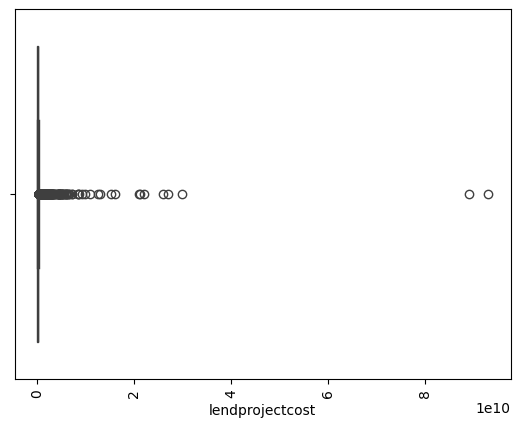

In [46]:
# Create the boxplot
sns.boxplot(x='lendprojectcost', data=df_projects_data_csv)

plt.xticks(rotation=90)

plt.show()

membuat histogram

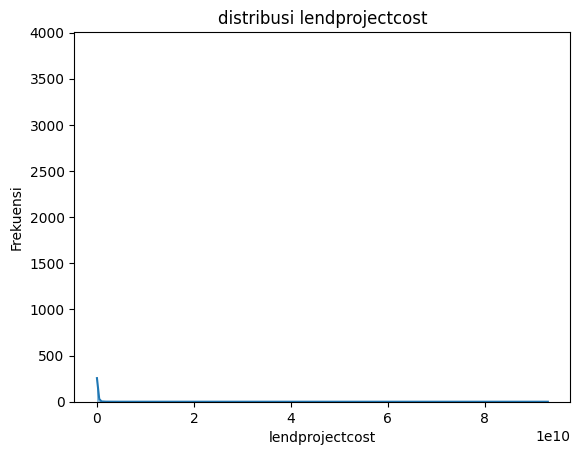

In [48]:
# Create a histogram to visualize the distribution of 'lendprojectcost'
sns.histplot(df_projects_data_csv['lendprojectcost'], kde=True)

plt.xlabel('lendprojectcost')
plt.ylabel('Frekuensi')
plt.title('distribusi lendprojectcost')

# Show the plot
plt.show()

In [30]:
(df_projects_data_csv['lendprojectcost'] == 0).sum()

150

menghapus dengan iqr

In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_projects_data_csv['lendprojectcost'].quantile(0.25)
Q3 = df_projects_data_csv['lendprojectcost'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 9000000.0
Q3: 98000000.0
IQR: 89000000.0
lower_bound: -124500000.0
upper_bound: 231500000.0


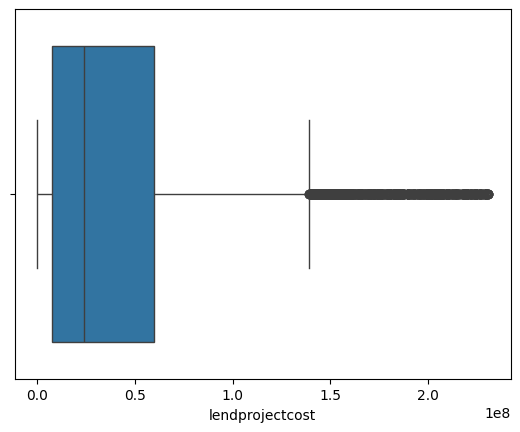

In [32]:
# Filter out rows where 'lendprojectcost' falls outside of the bounds
df_filtered = df_projects_data_csv[[
    'id', 'regionname', 'countryname', 'lendinginstr', 'lendprojectcost'
]][
    (df_projects_data_csv['lendprojectcost'] >= lower_bound)
    & (df_projects_data_csv['lendprojectcost'] <= upper_bound)
]

# Create the boxplot without outliers
sns.boxplot(x='lendprojectcost', data=df_filtered)

# Show the plot
plt.show()

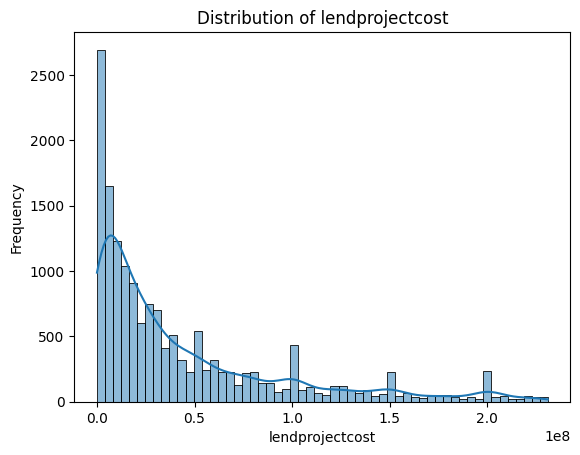

In [33]:
# Create a histogram to visualize the distribution of 'lendprojectcost'
sns.histplot(df_filtered['lendprojectcost'], kde=True)

plt.xlabel('lendprojectcost')
plt.ylabel('Frequency')
plt.title('Distribution of lendprojectcost')

# Show the plot
plt.show()

In [34]:
(df_filtered['lendprojectcost'] == 0).sum()

150

In [35]:
display(len(
    df_projects_data_csv[[
        'id', 'regionname', 'countryname', 'lendinginstr', 'lendprojectcost'
    ]]
))

display(len(
    df_projects_data_csv[[
        'id', 'regionname', 'countryname', 'lendinginstr', 'lendprojectcost'
    ]][
        (df_projects_data_csv['lendprojectcost'] >= lower_bound)
        & (df_projects_data_csv['lendprojectcost'] <= upper_bound)
    ]
))

18248

16092

In [36]:
display(df_projects_data_csv[[
    'id', 'regionname', 'countryname', 'lendinginstr', 'lendprojectcost'
]].describe())

display(df_filtered[['lendprojectcost']].describe())

,lendprojectcost
count,1.812300e+04
mean,1.348273e+08
std,1.134161e+09
min,0.000000e+00
25%,9.000000e+06
50%,3.000000e+07
75%,9.800000e+07
max,9.300700e+10


,lendprojectcost
count,1.609200e+04
mean,4.425228e+07
std,5.156286e+07
min,0.000000e+00
25%,7.300000e+06
50%,2.400000e+07
75%,6.000000e+07
max,2.311000e+08


In [37]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_filtered['lendprojectcost'].quantile(0.25)
Q3 = df_filtered['lendprojectcost'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 7300000.0
Q3: 60000000.0
IQR: 52700000.0
lower_bound: -71750000.0
upper_bound: 139050000.0


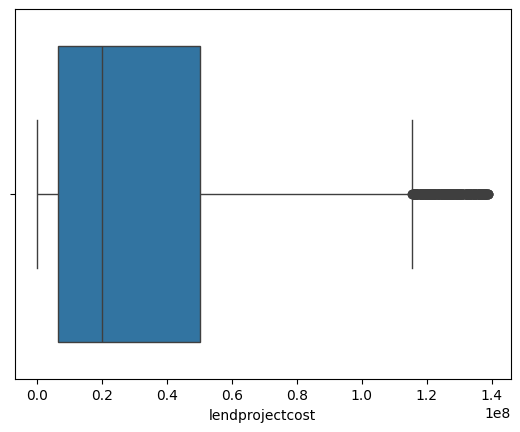

In [38]:
# Filter out rows where 'lendprojectcost' falls outside of the bounds
df_filtered_2 = df_filtered[
    (df_filtered['lendprojectcost'] >= lower_bound)
    & (df_filtered['lendprojectcost'] <= upper_bound)
]

# Create the boxplot without outliers
sns.boxplot(x='lendprojectcost', data=df_filtered_2)

# Show the plot
plt.show()

In [39]:
display(df_filtered[['lendprojectcost']].describe())

display(df_filtered_2[['lendprojectcost']].describe())

,lendprojectcost
count,1.609200e+04
mean,4.425228e+07
std,5.156286e+07
min,0.000000e+00
25%,7.300000e+06
50%,2.400000e+07
75%,6.000000e+07
max,2.311000e+08


,lendprojectcost
count,1.480400e+04
mean,3.258506e+07
std,3.356609e+07
min,0.000000e+00
25%,6.300000e+06
50%,2.000000e+07
75%,5.000000e+07
max,1.390000e+08


In [40]:
display(len(df_filtered))

display(len(
    df_filtered[[
        'id', 'regionname', 'countryname', 'lendinginstr', 'lendprojectcost'
    ]][
        (df_filtered['lendprojectcost'] >= lower_bound)
        & (df_filtered['lendprojectcost'] <= upper_bound)
    ]
))

16092

14804

# 3. Load

In [49]:
import sqlite3
from sqlalchemy import create_engine, text

In [50]:
df_rural_population_percent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [51]:
engine = create_engine('sqlite://', echo=False)

In [52]:
db_name = 'rural_population_percent'

df_rural_population_percent.to_sql(
    name=db_name,
    con=engine,
    if_exists='replace'
)

264